In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import warnings
import mplcursors
import seaborn as sns
import math
from datetime import datetime, timedelta
warnings.filterwarnings('ignore')

In [2]:
covid_test_dataset_original = pd.read_csv('covid19cases_test.csv')
covid_test_dataset = covid_test_dataset_original.copy()
covid_test_dataset.head()

,date,area,area_type,population,cases,cumulative_cases,deaths,cumulative_deaths,total_tests,cumulative_total_tests,positive_tests,cumulative_positive_tests,reported_cases,cumulative_reported_cases,reported_deaths,cumulative_reported_deaths,reported_tests
0,2020-02-01,Alameda,County,1685886.0,3.0,3.0,0.0,0.0,4.0,4,0.0,0,0.0,0.0,0.0,0.0,NaN
1,2020-02-02,Alameda,County,1685886.0,0.0,3.0,0.0,0.0,1.0,5,0.0,0,0.0,0.0,0.0,0.0,NaN
2,2020-02-03,Alameda,County,1685886.0,0.0,3.0,0.0,0.0,0.0,5,0.0,0,0.0,0.0,0.0,0.0,NaN
3,2020-02-04,Alameda,County,1685886.0,0.0,3.0,0.0,0.0,0.0,5,0.0,0,0.0,0.0,0.0,0.0,NaN
4,2020-02-05,Alameda,County,1685886.0,0.0,3.0,0.0,0.0,1.0,6,0.0,0,0.0,0.0,0.0,0.0,NaN


In [3]:
recent_date_end = '2022-01-05'

recent_date_start = (datetime.strptime(recent_date_end, "%Y-%m-%d") -timedelta(days=6)).strftime("%Y-%m-%d")

In [4]:
# There are 60 unique counties with "California" exclude in the datatset
len(covid_test_dataset['area'].unique())

61

In [5]:
covid_dataset_county = covid_test_dataset.copy()
covid_dataset_county = covid_test_dataset[covid_test_dataset['area_type']=='County']
covid_dataset_county.head()

,date,area,area_type,population,cases,cumulative_cases,deaths,cumulative_deaths,total_tests,cumulative_total_tests,positive_tests,cumulative_positive_tests,reported_cases,cumulative_reported_cases,reported_deaths,cumulative_reported_deaths,reported_tests
0,2020-02-01,Alameda,County,1685886.0,3.0,3.0,0.0,0.0,4.0,4,0.0,0,0.0,0.0,0.0,0.0,NaN
1,2020-02-02,Alameda,County,1685886.0,0.0,3.0,0.0,0.0,1.0,5,0.0,0,0.0,0.0,0.0,0.0,NaN
2,2020-02-03,Alameda,County,1685886.0,0.0,3.0,0.0,0.0,0.0,5,0.0,0,0.0,0.0,0.0,0.0,NaN
3,2020-02-04,Alameda,County,1685886.0,0.0,3.0,0.0,0.0,0.0,5,0.0,0,0.0,0.0,0.0,0.0,NaN
4,2020-02-05,Alameda,County,1685886.0,0.0,3.0,0.0,0.0,1.0,6,0.0,0,0.0,0.0,0.0,0.0,NaN


In [6]:
covid_dataset_newly_updated = covid_dataset_county.copy()
covid_dataset_newly_updated = covid_dataset_county[covid_dataset_county['date']==recent_date_end]
covid_dataset_newly_updated.head()

,date,area,area_type,population,cases,cumulative_cases,deaths,cumulative_deaths,total_tests,cumulative_total_tests,positive_tests,cumulative_positive_tests,reported_cases,cumulative_reported_cases,reported_deaths,cumulative_reported_deaths,reported_tests
704,2022-01-05,Alameda,County,1685886.0,179.0,148553.0,0.0,1554.0,970.0,4966328,205.0,179934,1464.0,144824.0,16.0,1548.0,15622.0
1411,2022-01-05,Alpine,County,1117.0,0.0,114.0,0.0,0.0,0.0,2730,0.0,65,-1.0,112.0,0.0,0.0,1.0
2118,2022-01-05,Amador,County,38531.0,7.0,6089.0,0.0,71.0,28.0,182430,7.0,7011,-13.0,6012.0,-1.0,70.0,129.0
2825,2022-01-05,Butte,County,217769.0,27.0,23429.0,0.0,346.0,184.0,378229,34.0,25567,40.0,23134.0,-3.0,343.0,903.0
3532,2022-01-05,Calaveras,County,44289.0,13.0,4825.0,0.0,93.0,45.0,80880,16.0,5620,-9.0,4758.0,-3.0,90.0,142.0


In [7]:
covid_dataset_v1 = {'Area':covid_dataset_county.groupby(['area'])['cases'].sum().index,
                 'Total_Cases':covid_dataset_county.groupby(['area'])['cases'].sum().values,
                 'Total_Deaths':covid_dataset_county.groupby(['area'])['deaths'].sum().values,
                 'Newly_Reported_Cases':covid_dataset_newly_updated.groupby(['area'])['reported_cases'].sum().values,
                 'Newly_Reported_Deaths':covid_dataset_newly_updated.groupby(['area'])['reported_deaths'].sum().values,
                 'Population': covid_dataset_newly_updated['population'].values
                }
covid_dataset_v1_dataset = pd.DataFrame(covid_dataset_v1)

In [8]:
covid_dataset_v1_dataset.head()

,Area,Total_Cases,Total_Deaths,Newly_Reported_Cases,Newly_Reported_Deaths,Population
0,Alameda,148564.0,1558.0,1464.0,16.0,1685886.0
1,Alpine,114.0,0.0,-1.0,0.0,1117.0
2,Amador,6091.0,71.0,-13.0,-1.0,38531.0
3,Butte,23430.0,347.0,40.0,-3.0,217769.0
4,Calaveras,4825.0,93.0,-9.0,-3.0,44289.0


## Total Cases / Deaths

In [9]:
total_cases_dataset_rank = covid_dataset_v1_dataset.sort_values("Total_Cases", ascending=False)
total_deaths_dataset_rank = covid_dataset_v1_dataset.sort_values("Total_Deaths", ascending=False)

Text(0.5, 1.0, 'Total Cases')

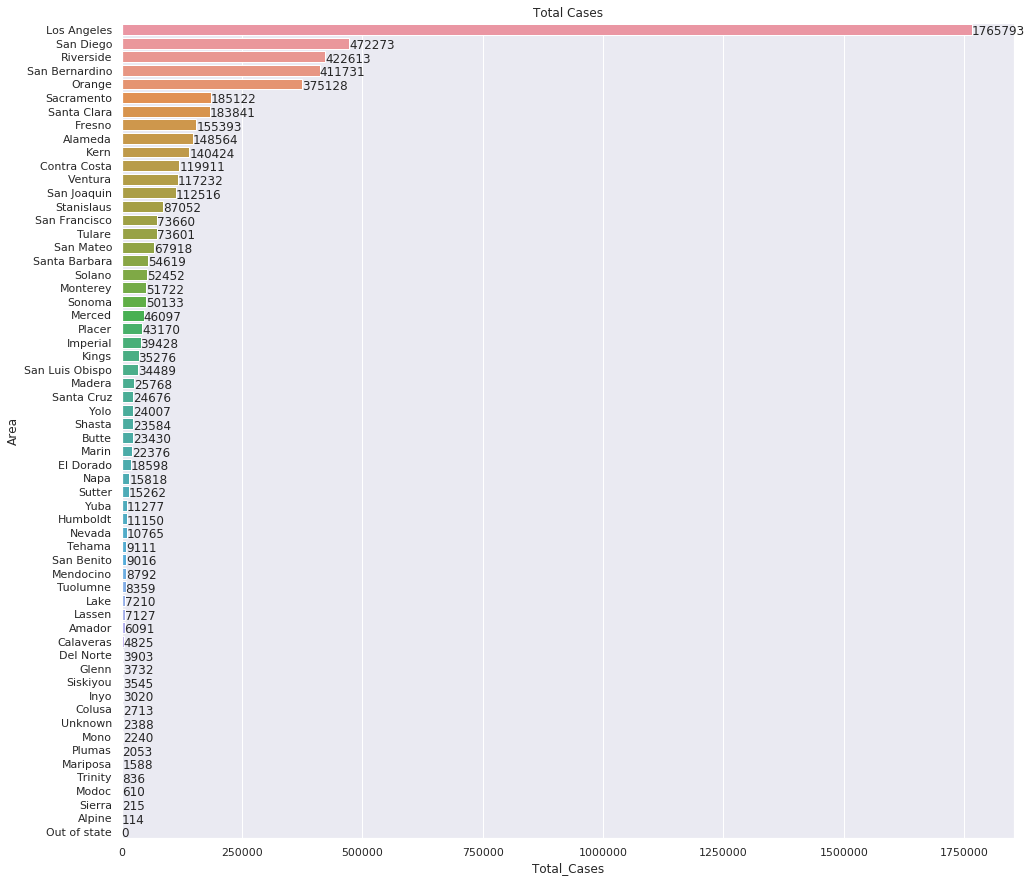

In [10]:
sns.set(rc = {'figure.figsize':(16,15)})
g1 = sns.barplot(x =total_cases_dataset_rank["Total_Cases"], y=total_cases_dataset_rank["Area"])

initialx=0
for p in g1.patches:
    g1.text(p.get_width()+1,initialx+p.get_height()/2,"{:1.0f}".format(p.get_width()))
    initialx+=1

g1.set_title("Total Cases")

Text(0.5, 1.0, 'Total Deaths')

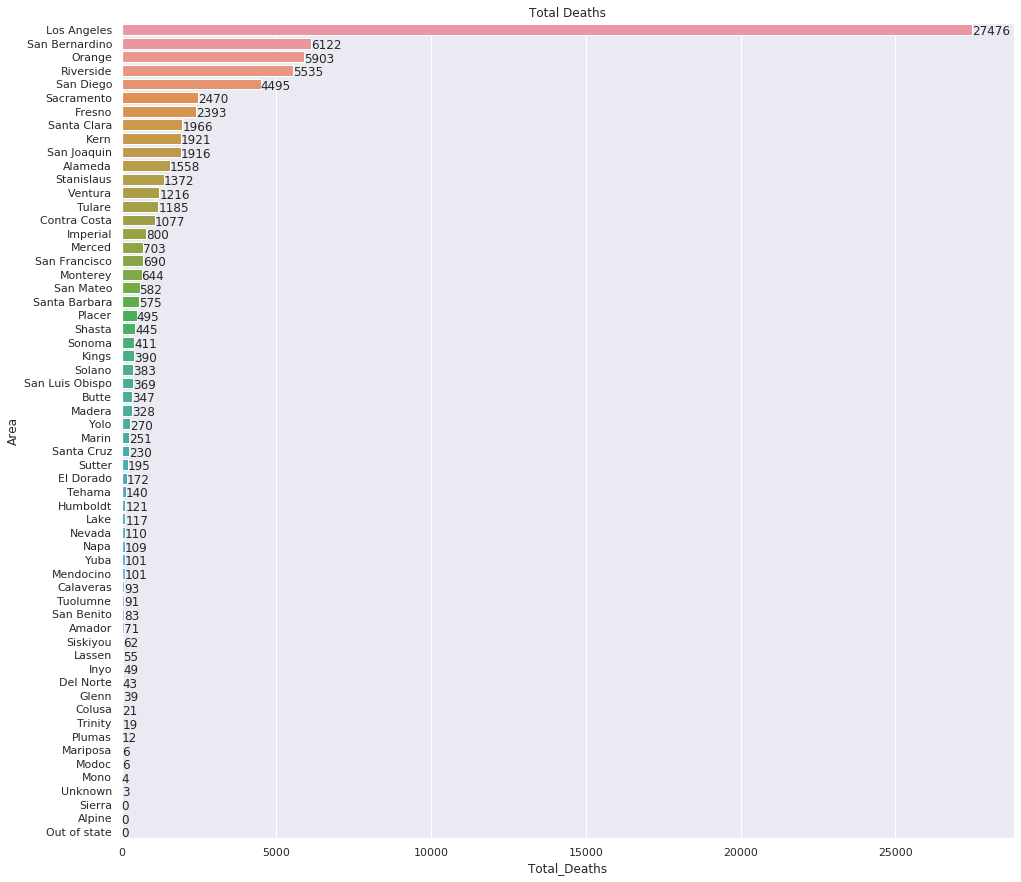

In [11]:
sns.set(rc = {'figure.figsize':(16,15)})
g1 = sns.barplot(x =total_deaths_dataset_rank["Total_Deaths"], y=total_deaths_dataset_rank["Area"])

initialx=0
for p in g1.patches:
    g1.text(p.get_width()+1,initialx+p.get_height()/2,"{:1.0f}".format(p.get_width()))
    initialx+=1

g1.set_title("Total Deaths")

## Newly Updated Cases/ Deaths (Reported in 01/05/2022)

In [12]:
newly_reported_cases_dataset_rank = covid_dataset_v1_dataset.sort_values("Newly_Reported_Cases", ascending=False)
newly_reported_deaths_dataset_rank = covid_dataset_v1_dataset.sort_values("Newly_Reported_Deaths", ascending=False)

Text(0.5, 1.0, 'Newly Cases (Reported in 01/05/2022)')

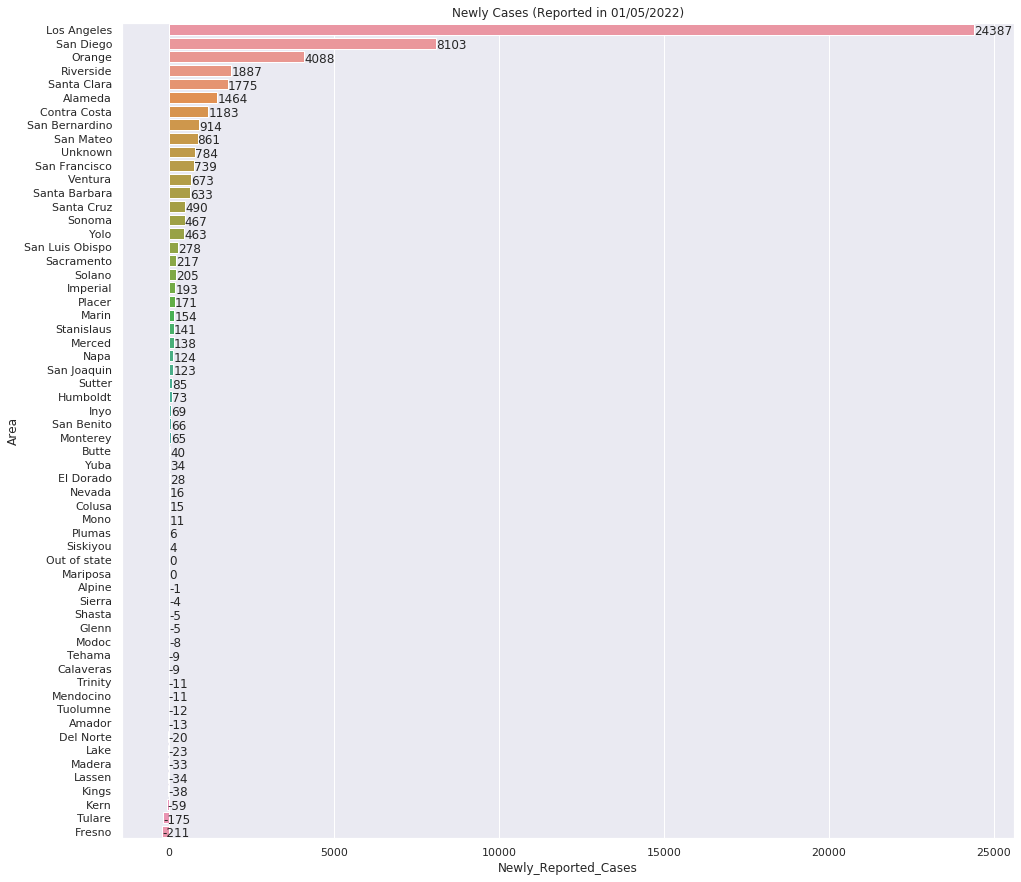

In [13]:
sns.set(rc = {'figure.figsize':(16,15)})
g1 = sns.barplot(x = newly_reported_cases_dataset_rank["Newly_Reported_Cases"],
                 y = newly_reported_cases_dataset_rank["Area"])

initialx=0
for p in g1.patches:
    g1.text(p.get_width()+1,initialx+p.get_height()/2,"{:1.0f}".format(p.get_width()))
    initialx+=1

g1.set_title("Newly Cases (Reported in 01/05/2022)")

Text(0.5, 1.0, 'Newly Deaths (Reported in 01/05/2022)')

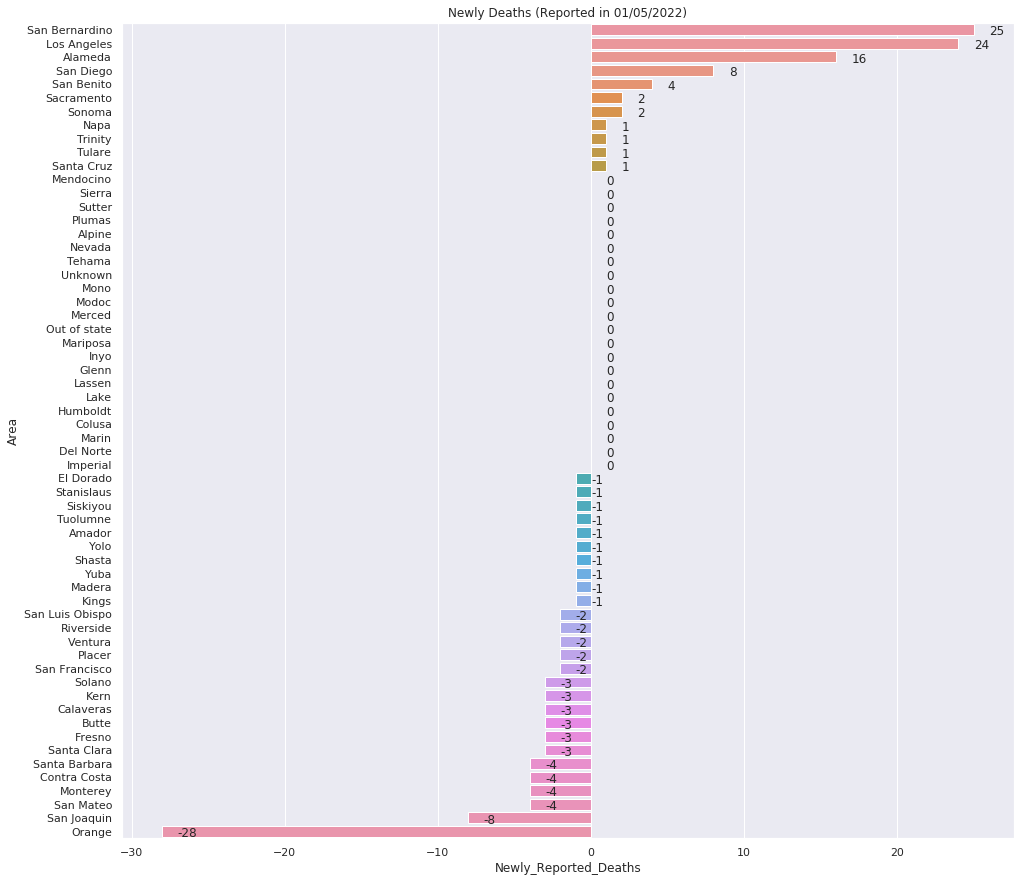

In [14]:
sns.set(rc = {'figure.figsize':(16,15)})
g1 = sns.barplot(x =newly_reported_deaths_dataset_rank["Newly_Reported_Deaths"], 
                 y=newly_reported_deaths_dataset_rank["Area"])

initialx=0
for p in g1.patches:
    g1.text(p.get_width()+1,initialx+p.get_height()/2,"{:1.0f}".format(p.get_width()))
    initialx+=1

g1.set_title("Newly Deaths (Reported in 01/05/2022)")

## Cumulative Cases/Deaths per 100k

In [15]:
covid_dataset_v2_dataset = covid_dataset_v1_dataset.copy()

In [16]:
#Total_Cases / Population
covid_dataset_v2_dataset['cumulative_cases'] = (covid_dataset_v2_dataset['Total_Cases'] / covid_dataset_v2_dataset['Population'])
covid_dataset_v2_dataset['cumulative_cases_per_100k'] = round(covid_dataset_v2_dataset['cumulative_cases'] * 100000,2)
cumulative_cases_dataset_rank = covid_dataset_v2_dataset.sort_values("cumulative_cases_per_100k", ascending=False)

In [17]:
#Total_Cases / Population
covid_dataset_v2_dataset['cumulative_deaths'] = (covid_dataset_v2_dataset['Total_Deaths'] / covid_dataset_v2_dataset['Population'])
covid_dataset_v2_dataset['cumulative_deaths_per_100k'] = round(covid_dataset_v2_dataset['cumulative_deaths'] * 100000,2)
cumulative_deaths_dataset_rank = covid_dataset_v2_dataset.sort_values("cumulative_deaths_per_100k", ascending=False)

Text(0.5, 1.0, 'Cumulative Cases (Per 100k)')

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


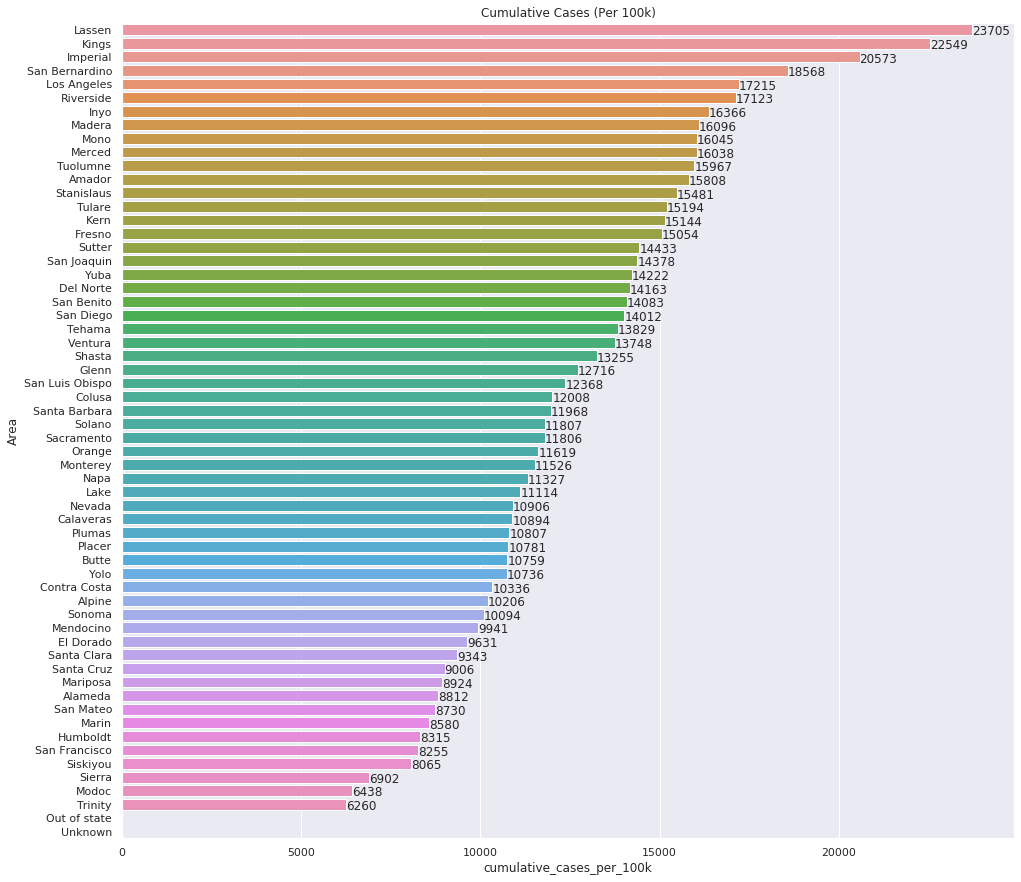

In [18]:
sns.set(rc = {'figure.figsize':(16,15)})
g1 = sns.barplot(x =cumulative_cases_dataset_rank["cumulative_cases_per_100k"],
                 y=cumulative_cases_dataset_rank["Area"])

initialx=0
for p in g1.patches:
    g1.text(p.get_width()+1,initialx+p.get_height()/2,"{:1.0f}".format(p.get_width()))
    initialx+=1

g1.set_title("Cumulative Cases (Per 100k)")

Text(0.5, 1.0, 'Cumulative Deaths (Per 100k)')

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


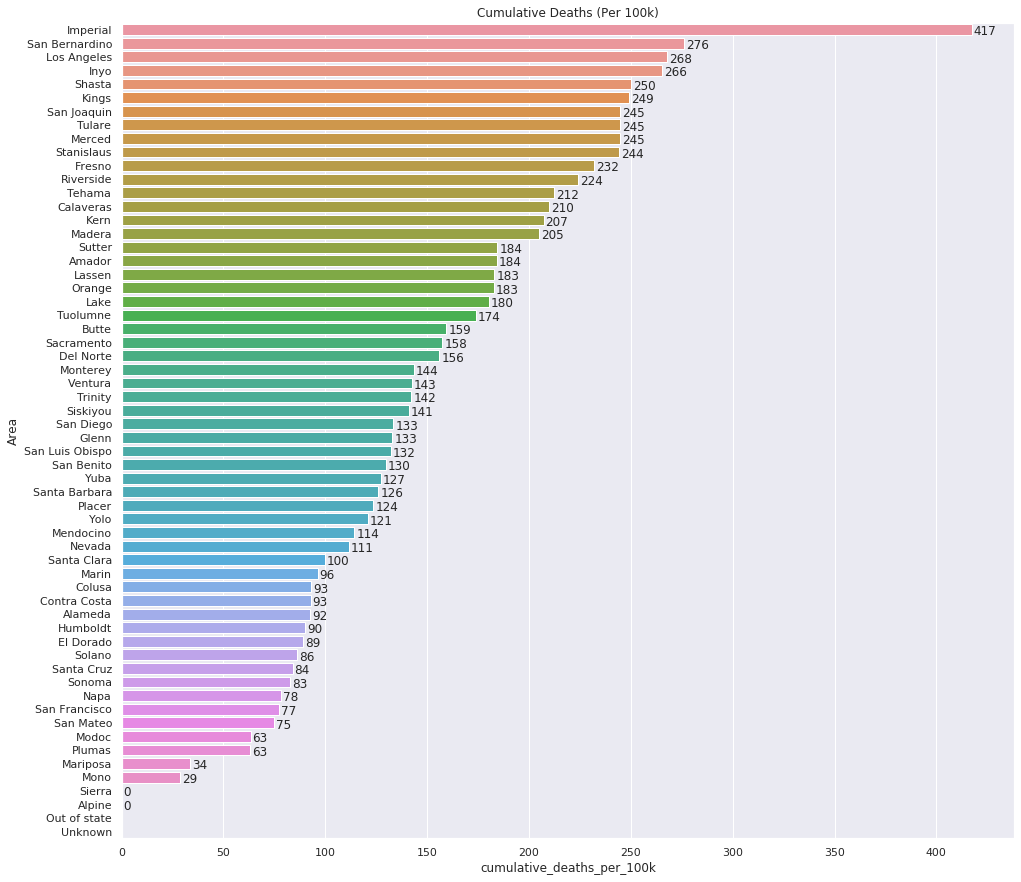

In [19]:
sns.set(rc = {'figure.figsize':(16,15)})
g1 = sns.barplot(x =cumulative_deaths_dataset_rank["cumulative_deaths_per_100k"],
                 y=cumulative_deaths_dataset_rank["Area"])

initialx=0
for p in g1.patches:
    g1.text(p.get_width()+1,initialx+p.get_height()/2,"{:1.0f}".format(p.get_width()))
    initialx+=1

g1.set_title("Cumulative Deaths (Per 100k)")

In [20]:
covid_dataset_v3_dataset = covid_dataset_v2_dataset.copy()
covid_dataset_v3_dataset.head()

,Area,Total_Cases,Total_Deaths,Newly_Reported_Cases,Newly_Reported_Deaths,Population,cumulative_cases,cumulative_cases_per_100k,cumulative_deaths,cumulative_deaths_per_100k
0,Alameda,148564.0,1558.0,1464.0,16.0,1685886.0,0.088122,8812.22,0.000924,92.41
1,Alpine,114.0,0.0,-1.0,0.0,1117.0,0.102059,10205.91,0.000000,0.00
2,Amador,6091.0,71.0,-13.0,-1.0,38531.0,0.158081,15808.05,0.001843,184.27
3,Butte,23430.0,347.0,40.0,-3.0,217769.0,0.107591,10759.11,0.001593,159.34
4,Calaveras,4825.0,93.0,-9.0,-3.0,44289.0,0.108944,10894.35,0.002100,209.98


In [21]:
covid_dataset_county_v2 = covid_dataset_county.copy()
covid_dataset_county_v2.head()

,date,area,area_type,population,cases,cumulative_cases,deaths,cumulative_deaths,total_tests,cumulative_total_tests,positive_tests,cumulative_positive_tests,reported_cases,cumulative_reported_cases,reported_deaths,cumulative_reported_deaths,reported_tests
0,2020-02-01,Alameda,County,1685886.0,3.0,3.0,0.0,0.0,4.0,4,0.0,0,0.0,0.0,0.0,0.0,NaN
1,2020-02-02,Alameda,County,1685886.0,0.0,3.0,0.0,0.0,1.0,5,0.0,0,0.0,0.0,0.0,0.0,NaN
2,2020-02-03,Alameda,County,1685886.0,0.0,3.0,0.0,0.0,0.0,5,0.0,0,0.0,0.0,0.0,0.0,NaN
3,2020-02-04,Alameda,County,1685886.0,0.0,3.0,0.0,0.0,0.0,5,0.0,0,0.0,0.0,0.0,0.0,NaN
4,2020-02-05,Alameda,County,1685886.0,0.0,3.0,0.0,0.0,1.0,6,0.0,0,0.0,0.0,0.0,0.0,NaN


## Cases/Deaths per 100k (7-day average)

In [22]:
covid_dataset_county_v2['date']
covid_dataset_county_newly_v2 = covid_dataset_county_v2[(covid_dataset_county_v2['date']>= recent_date_start) & 
                                                        (covid_dataset_county_v2['date']<=recent_date_end)]
covid_dataset_county_newly_v2.head()

,date,area,area_type,population,cases,cumulative_cases,deaths,cumulative_deaths,total_tests,cumulative_total_tests,positive_tests,cumulative_positive_tests,reported_cases,cumulative_reported_cases,reported_deaths,cumulative_reported_deaths,reported_tests
698,2021-12-30,Alameda,County,1685886.0,2867.0,141901.0,0.0,1553.0,20108.0,4918041,3641.0,171768,1900.0,133486.0,-1.0,1528.0,15862.0
699,2021-12-31,Alameda,County,1685886.0,1025.0,142926.0,0.0,1553.0,8024.0,4926065,1260.0,173028,0.0,133486.0,0.0,1528.0,NaN
700,2022-01-01,Alameda,County,1685886.0,375.0,143301.0,0.0,1553.0,2098.0,4928163,448.0,173476,0.0,133486.0,0.0,1528.0,NaN
701,2022-01-02,Alameda,County,1685886.0,1180.0,144481.0,1.0,1554.0,9190.0,4937353,1426.0,174902,0.0,133486.0,0.0,1528.0,NaN
702,2022-01-03,Alameda,County,1685886.0,2919.0,147400.0,0.0,1554.0,20829.0,4958182,3666.0,178568,8604.0,142090.0,1.0,1529.0,58055.0


In [23]:
covid_dataset_newly = {'Date':covid_dataset_county_newly_v2.groupby(['date'])['cases'].sum().index,
                       'Total_Cases_7days':covid_dataset_county_newly_v2.groupby(['date'])['cases'].sum().values,
                       'Total_Deaths_7days':covid_dataset_county_newly_v2.groupby(['date'])['deaths'].sum().values
                      }
covid_dataset_newly_dataset = pd.DataFrame(covid_dataset_newly)
covid_dataset_newly_dataset

,Date,Total_Cases_7days,Total_Deaths_7days
0,2021-12-30,74041.0,18.0
1,2021-12-31,40948.0,19.0
2,2022-01-01,16218.0,18.0
3,2022-01-02,34513.0,14.0
4,2022-01-03,74933.0,21.0
5,2022-01-04,25981.0,17.0
6,2022-01-05,4738.0,0.0


In [24]:
cases_7day = []
deaths_7day = []
window_size =7
for i in range(0, len(covid_dataset_newly_dataset)):
    if i == 0:
        cases_7day.append(covid_dataset_newly_dataset['Total_Cases_7days'][0])
        deaths_7day.append(covid_dataset_newly_dataset['Total_Deaths_7days'][0])
    else:
        cases_window = covid_dataset_newly_dataset['Total_Cases_7days'][0:i+1]
        deaths_window = covid_dataset_newly_dataset['Total_Deaths_7days'][0:i+1]
        cases_window_sum= sum(cases_window)
        deaths_window_sum= sum(deaths_window)
        cases_7day.append(cases_window_sum) 
        deaths_7day.append(deaths_window_sum) 

In [25]:
covid_dataset_newly_dataset['Total_Cases_7days_sum'] = cases_7day
covid_dataset_newly_dataset['Total_Deaths_7days_sum'] = deaths_7day

In [26]:
covid_dataset_newly_dataset.head(3)

,Date,Total_Cases_7days,Total_Deaths_7days,Total_Cases_7days_sum,Total_Deaths_7days_sum
0,2021-12-30,74041.0,18.0,74041.0,18.0
1,2021-12-31,40948.0,19.0,114989.0,37.0
2,2022-01-01,16218.0,18.0,131207.0,55.0


In [27]:
cases_7day_avg = []
deaths_7day_avg = []
for i in range(0, len(covid_dataset_newly_dataset)):
    cases_window_avg = covid_dataset_newly_dataset['Total_Cases_7days_sum'][i] / (i+1)
    deaths_window_avg = covid_dataset_newly_dataset['Total_Deaths_7days_sum'][i] / (i+1)
    cases_7day_avg.append(cases_window_avg)
    deaths_7day_avg.append(deaths_window_avg)

In [28]:
covid_dataset_newly_updated_max_population = covid_dataset_newly_updated.copy()

In [29]:
Cases_per_100k_7_day_average = (sum(cases_7day_avg)/7) / sum(covid_dataset_newly_updated_max_population['population'].dropna())*100000
Deaths_per_100k_7_day_average = (sum(deaths_7day_avg)/7) / sum(covid_dataset_newly_updated_max_population['population'].dropna())*100000

## Cases/Deaths 7 day average (per 100k) by California counties

In [30]:
covid_dataset_county_newly_v3 = covid_dataset_county_newly_v2.copy()
covid_dataset_county_newly_v3.head()

,date,area,area_type,population,cases,cumulative_cases,deaths,cumulative_deaths,total_tests,cumulative_total_tests,positive_tests,cumulative_positive_tests,reported_cases,cumulative_reported_cases,reported_deaths,cumulative_reported_deaths,reported_tests
698,2021-12-30,Alameda,County,1685886.0,2867.0,141901.0,0.0,1553.0,20108.0,4918041,3641.0,171768,1900.0,133486.0,-1.0,1528.0,15862.0
699,2021-12-31,Alameda,County,1685886.0,1025.0,142926.0,0.0,1553.0,8024.0,4926065,1260.0,173028,0.0,133486.0,0.0,1528.0,NaN
700,2022-01-01,Alameda,County,1685886.0,375.0,143301.0,0.0,1553.0,2098.0,4928163,448.0,173476,0.0,133486.0,0.0,1528.0,NaN
701,2022-01-02,Alameda,County,1685886.0,1180.0,144481.0,1.0,1554.0,9190.0,4937353,1426.0,174902,0.0,133486.0,0.0,1528.0,NaN
702,2022-01-03,Alameda,County,1685886.0,2919.0,147400.0,0.0,1554.0,20829.0,4958182,3666.0,178568,8604.0,142090.0,1.0,1529.0,58055.0


In [31]:
covid_dataset_county_newly_v3.drop(['area_type', 'cumulative_cases', 'cumulative_deaths','total_tests',
                                    'cumulative_total_tests', 'positive_tests', 'cumulative_positive_tests',
                                    'reported_cases', 'cumulative_reported_cases', 'reported_deaths',
                                    'cumulative_reported_deaths', 'reported_tests'], axis=1, inplace=True)

In [32]:
def extract_cases_7_days_average_per_100k(area_name):
    cases_7day = []
    cases_7day_avg = []
    county_toal_cases = covid_dataset_county_newly_v3[covid_dataset_county_newly_v2['area']==area_name].groupby(['date'])['cases'].sum().values
    population = covid_dataset_county_newly_v3[covid_dataset_county_newly_v2['area']==area_name]['population'].values[6]
    for i in range(0, len(covid_dataset_newly_dataset)):
        if i == 0:
            cases_7day.append(county_toal_cases[0])
        else:
            cases_window = county_toal_cases[0:i+1]
            cases_window_sum= sum(cases_window)
            cases_7day.append(cases_window_sum) 
    for i in range(0, 7):
        cases_window_avg = cases_7day[i] / (i+1)
        cases_7day_avg.append(cases_window_avg)
    Cases_per_100k_7_day_average = (sum(cases_7day_avg)/7) / population *100000
    return Cases_per_100k_7_day_average

In [33]:
def extract_deaths_7_days_average_per_100k(area_name):
    deaths_7day = []
    deaths_7day_avg = []
    county_toal_deaths = covid_dataset_county_newly_v3[covid_dataset_county_newly_v2['area']==area_name].groupby(['date'])['deaths'].sum().values
    population = covid_dataset_county_newly_v3[covid_dataset_county_newly_v2['area']==area_name]['population'].values[6]
    for i in range(0, len(covid_dataset_newly_dataset)):
        if i == 0:
            deaths_7day.append(county_toal_deaths[0])
        else:
            deaths_window = county_toal_deaths[0:i+1]
            deaths_window_sum= sum(deaths_window)
            deaths_7day.append(deaths_window_sum) 
    for i in range(0, 7):
        deaths_window_avg = deaths_7day[i] / (i+1)
        deaths_7day_avg.append(deaths_window_avg)
    Deaths_per_100k_7_day_average = (sum(deaths_7day_avg)/7) / population*100000
    return Deaths_per_100k_7_day_average

In [34]:
extract_7_days_average_per_100k =[]
for i in covid_dataset_county_newly_v3['area'].unique():
    extract_7_days_average_per_100k.append(
        {
            'Area': i,
            'Average_Cases_7_days': extract_cases_7_days_average_per_100k(i),
            'Average_Deaths_7_days': extract_deaths_7_days_average_per_100k(i),
        }
    )
extract_7_days_average_per_100k_dataset = pd.DataFrame(extract_7_days_average_per_100k)

In [35]:
extract_cases_7_days_average_per_100k_rank = extract_7_days_average_per_100k_dataset.sort_values("Average_Cases_7_days", ascending=False)
extract_deaths_7_days_average_per_100k_rank = extract_7_days_average_per_100k_dataset.sort_values("Average_Deaths_7_days", ascending=False)

Text(0.5, 1.0, 'Cases 7 day average (Per 100k)')

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


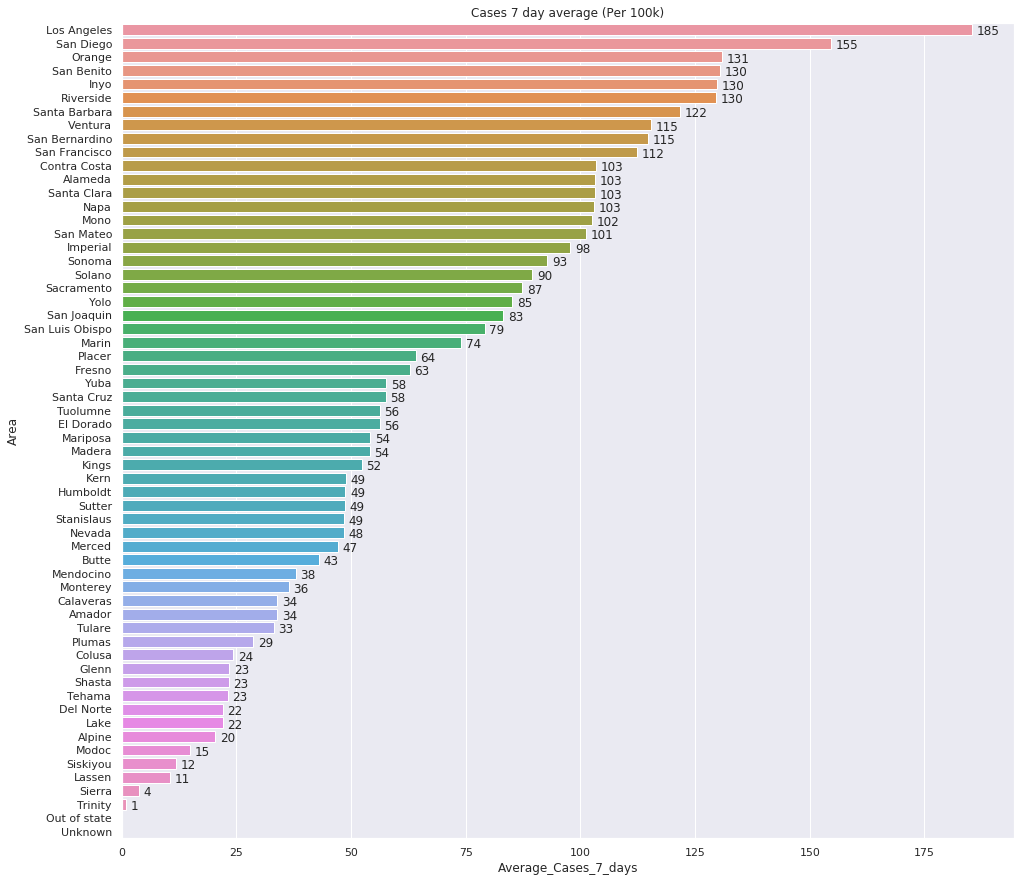

In [36]:
sns.set(rc = {'figure.figsize':(16,15)})
g1 = sns.barplot(x =extract_cases_7_days_average_per_100k_rank["Average_Cases_7_days"],
                 y=extract_cases_7_days_average_per_100k_rank["Area"])

initialx=0
for p in g1.patches:
    g1.text(p.get_width()+1,initialx+p.get_height()/2,"{:1.0f}".format(p.get_width()))
    initialx+=1

g1.set_title("Cases 7 day average (Per 100k)")

Text(0.5, 1.0, 'Deaths 7 day average (Per 100k)')

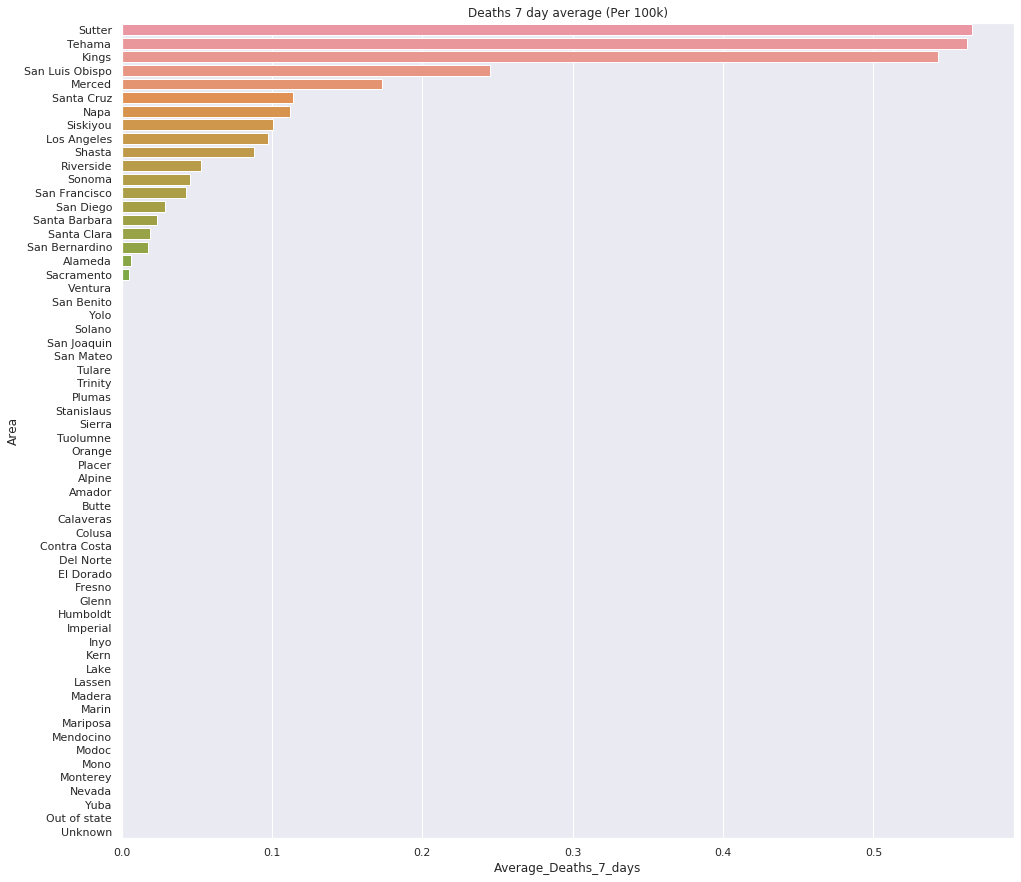

In [37]:
sns.set(rc = {'figure.figsize':(16,15)})
g1 = sns.barplot(x =extract_deaths_7_days_average_per_100k_rank ["Average_Deaths_7_days"],
                 y=extract_deaths_7_days_average_per_100k_rank ["Area"])

# initialx=0
# for p in g1.patches:
#     g1.text(p.get_width()+1,initialx+p.get_height()/2,"{:1.0f}".format(p.get_width()))
#     initialx+=1

g1.set_title("Deaths 7 day average (Per 100k)")

In [38]:
covid_dataset_county_v3 = covid_dataset_county_v2.copy()
covid_dataset_county_v3.head()

,date,area,area_type,population,cases,cumulative_cases,deaths,cumulative_deaths,total_tests,cumulative_total_tests,positive_tests,cumulative_positive_tests,reported_cases,cumulative_reported_cases,reported_deaths,cumulative_reported_deaths,reported_tests
0,2020-02-01,Alameda,County,1685886.0,3.0,3.0,0.0,0.0,4.0,4,0.0,0,0.0,0.0,0.0,0.0,NaN
1,2020-02-02,Alameda,County,1685886.0,0.0,3.0,0.0,0.0,1.0,5,0.0,0,0.0,0.0,0.0,0.0,NaN
2,2020-02-03,Alameda,County,1685886.0,0.0,3.0,0.0,0.0,0.0,5,0.0,0,0.0,0.0,0.0,0.0,NaN
3,2020-02-04,Alameda,County,1685886.0,0.0,3.0,0.0,0.0,0.0,5,0.0,0,0.0,0.0,0.0,0.0,NaN
4,2020-02-05,Alameda,County,1685886.0,0.0,3.0,0.0,0.0,1.0,6,0.0,0,0.0,0.0,0.0,0.0,NaN


In [39]:
covid_moving_average = {'Date':covid_dataset_county_v3.groupby(['date'])['cases'].sum().index,
                       'Total_Cases_7days':covid_dataset_county_v3.groupby(['date'])['cases'].sum().values,
                       'Total_Deaths_7days':covid_dataset_county_v3.groupby(['date'])['deaths'].sum().values
                      }
covid_moving_average_dataset = pd.DataFrame(covid_moving_average)
covid_moving_average_dataset.head()

,Date,Total_Cases_7days,Total_Deaths_7days
0,2020-02-01,23.0,0.0
1,2020-02-02,7.0,0.0
2,2020-02-03,5.0,0.0
3,2020-02-04,1.0,0.0
4,2020-02-05,3.0,0.0


In [40]:
cases_7day = []
deaths_7day = []
window_size =7
for i in range(0, len(covid_moving_average_dataset)):
    if i == 0:
        cases_7day.append(covid_moving_average_dataset['Total_Cases_7days'][0])
        deaths_7day.append(covid_moving_average_dataset['Total_Deaths_7days'][0])
    else:
        cases_window = covid_moving_average_dataset['Total_Cases_7days'][i:window_size+i]
        deaths_window = covid_moving_average_dataset['Total_Deaths_7days'][i:window_size+i]
        cases_window_sum= sum(cases_window) / window_size
        deaths_window_sum= sum(deaths_window) / window_size
        cases_7day.append(cases_window_sum) 
        deaths_7day.append(deaths_window_sum) 
covid_moving_average_dataset['Cases_Moving_average_7days'] = cases_7day
covid_moving_average_dataset['Deaths_Moving_average_7days'] = deaths_7day

In [41]:
covid_moving_average_dataset.head()

,Date,Total_Cases_7days,Total_Deaths_7days,Cases_Moving_average_7days,Deaths_Moving_average_7days
0,2020-02-01,23.0,0.0,23.000000,0.000000
1,2020-02-02,7.0,0.0,8.714286,0.142857
2,2020-02-03,5.0,0.0,8.571429,0.142857
3,2020-02-04,1.0,0.0,8.714286,0.142857
4,2020-02-05,3.0,0.0,9.142857,0.142857


In [42]:
covid_moving_average_dataset['Date'] = pd.to_datetime(covid_moving_average_dataset['Date'], format = '%Y-%m-%d')

Text(0.5, 1.0, 'Cases per 100k (7-day average)')

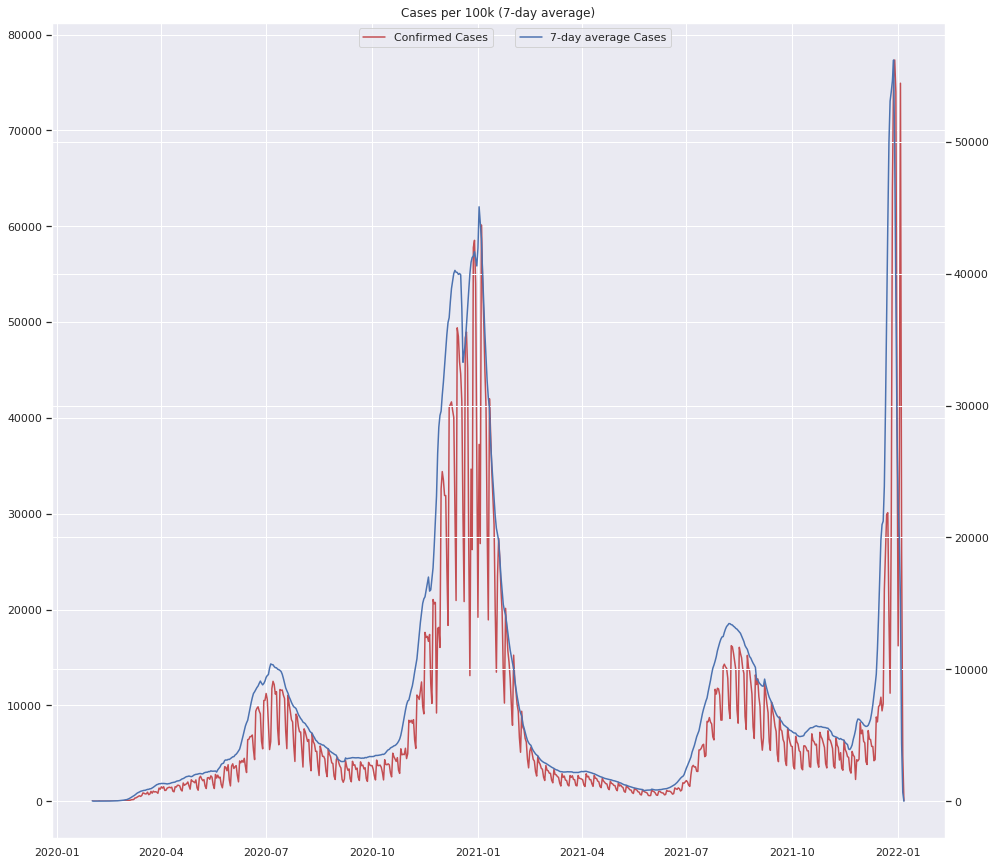

In [43]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(covid_moving_average_dataset['Date'], covid_moving_average_dataset['Total_Cases_7days'], color='r', label='Confirmed Cases')
ax2.plot(covid_moving_average_dataset['Date'], covid_moving_average_dataset['Cases_Moving_average_7days'], label='7-day average Cases')
ax1.legend(bbox_to_anchor=(0.5, 1.0))
ax2.legend(bbox_to_anchor=(0.7, 1.0))
ax1.set_title("Cases per 100k (7-day average)")

Text(0.5, 1.0, 'Deaths per 100k (7-day average)')

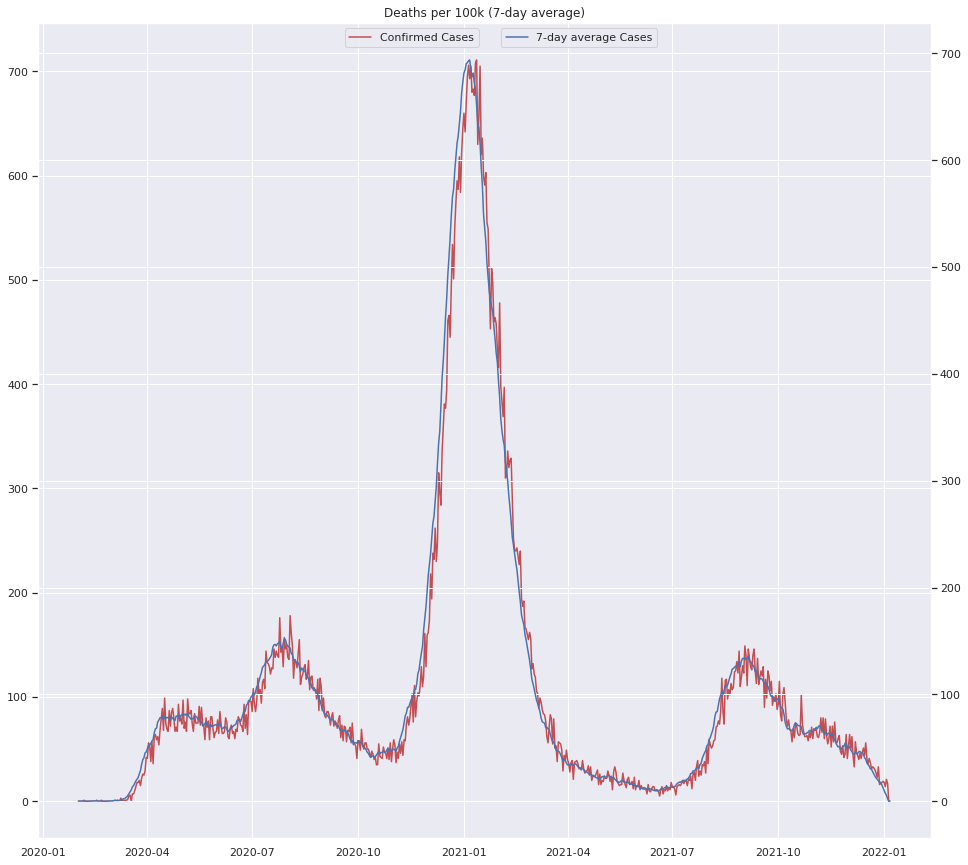

In [44]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(covid_moving_average_dataset['Date'], covid_moving_average_dataset['Total_Deaths_7days'], color='r', label='Confirmed Cases')
ax2.plot(covid_moving_average_dataset['Date'], covid_moving_average_dataset['Deaths_Moving_average_7days'], label='7-day average Cases')
ax1.legend(bbox_to_anchor=(0.5, 1.0))
ax2.legend(bbox_to_anchor=(0.7, 1.0))
ax1.set_title("Deaths per 100k (7-day average)")

In [45]:
covid_dataset_v4_dataset = covid_dataset_v1_dataset.copy()
covid_dataset_v4_dataset.head()

,Area,Total_Cases,Total_Deaths,Newly_Reported_Cases,Newly_Reported_Deaths,Population
0,Alameda,148564.0,1558.0,1464.0,16.0,1685886.0
1,Alpine,114.0,0.0,-1.0,0.0,1117.0
2,Amador,6091.0,71.0,-13.0,-1.0,38531.0
3,Butte,23430.0,347.0,40.0,-3.0,217769.0
4,Calaveras,4825.0,93.0,-9.0,-3.0,44289.0


In [46]:
Total_CA_Cases =sum(covid_dataset_v4_dataset['Total_Cases'].values)
RecentCases_010522 = sum(covid_dataset_county_v2[covid_dataset_county_v2['date']==recent_date_end]['reported_cases'].dropna().values)
Cases_percent_010522 = round((RecentCases_010522/Total_CA_Cases)*100,4)
Total_CA_Deaths =sum(covid_dataset_v4_dataset['Total_Deaths'].values)
RecentDeaths_010522 = sum(covid_dataset_county_v2[covid_dataset_county_v2['date']==recent_date_end]['reported_deaths'].dropna().values)
Deaths_percent_010522 = round((RecentDeaths_010522/Total_CA_Deaths)*100,4)

In [47]:
print("Cases (Statewide)")
print("Total US Cases is "+str(Total_CA_Cases))
print("Covid19 cases in %s is +"%(recent_date_end) + str(RecentCases_010522) + "(+"+str(Cases_percent_010522)+"%)")
print("Cases per 100k 7-day average: " + str(round(Cases_per_100k_7_day_average,2)))
print("------------------------------------")
print("Deaths (Statewide)")
print("Total US Deaths is "+str(Total_CA_Deaths))
print("Covid19 deaths in %s is "%(recent_date_end)+ str(RecentDeaths_010522) + "("+str(Deaths_percent_010522 )+"%)")
print("Deaths per 100k 7-day average: " + str(round(Deaths_per_100k_7_day_average,2)))

Cases (Statewide)
Total US Cases is 5634357.0
Covid19 cases in 2022-01-05 is +50486.0(+0.896%)
Cases per 100k 7-day average: 123.9
------------------------------------
Deaths (Statewide)
Total US Deaths is 76341.0
Covid19 deaths in 2022-01-05 is -5.0(-0.0065%)
Deaths per 100k 7-day average: 0.04
